## Objectives
- Prepare the data for training
- Select an algo (start with)
- Train
- Test (produce MSE & RMSE for the test set)

**Bonus:**
- Produce a plot of predicted vs. actual disease progression from your model.
- Try,  OLS linear model, k-NN regression, support vector machines regression, random forest regression. Which algo type works best for this data?

### Imports

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble

C:\Users\wardy\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Loading dataset

In [2]:
diabetes_data = datasets.load_diabetes()

diabetes = pd.DataFrame(diabetes_data["data"], columns=diabetes_data["feature_names"])
diabetes["disease_progression"] = diabetes_data["target"]

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Function to prepare data for training

In [24]:
def prepare_data(df, target_column, test_size=0.3, random_state=42):
    # This assumes all other columns except target_column is features
    
    features = [i for i in df.columns if i != target_column]
    
    X = df[features]
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=random_state)
    
    return X_train, X_test, y_train, y_test

### Training the model

In [25]:
def train_model(X_train, y_train, model):
    return model.fit(X_train, y_train)

### Test model

In [43]:
def produce_model_predictions(fitted_model, X_test, y_test):
    prediction = fitted_model.predict(X_test)
    comparison = pd.DataFrame({
                               "prediction": prediction,
                               "actual": y_test
                             })
    return comparison

def return_model_mse(df):
    # df should have two columns, the prediction and actuals
    df["error"] = df["prediction"] - df["actual"]
    df["squared_error"] = df["error"]**2

    mse = df['squared_error'].mean()
    
    return mse

### Looping through the models

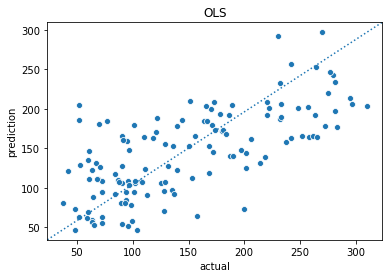

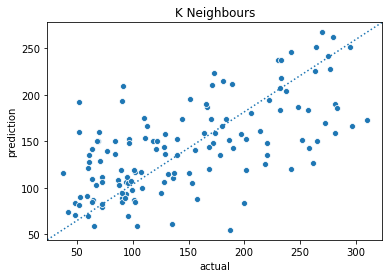

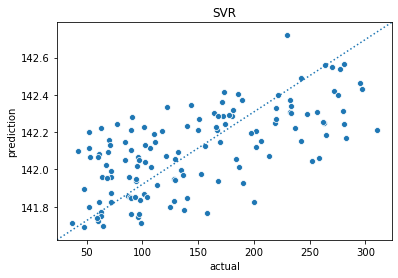

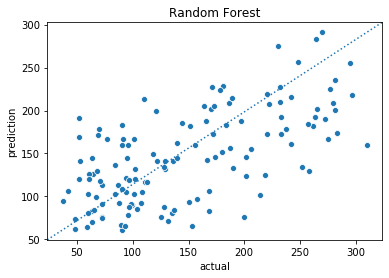

In [64]:
X_train, X_test, y_train, y_test = prepare_data(diabetes, 'disease_progression')

models = {'OLS': linear_model.LinearRegression(), 
          'K Neighbours': neighbors.KNeighborsRegressor(), 
          'SVR': svm.SVR(),
          'Random Forest': ensemble.RandomForestRegressor()
         }

mse_dict = {}

for m in models.keys():
    train_model(X_train, y_train, models[m])
    fitted_model = models[m].fit(X_train, y_train)
    comparison = produce_model_predictions(fitted_model, X_test, y_test)
    
    ax = sns.scatterplot(y='prediction', x='actual', data=comparison)
    ax.plot([0, 1], [0, 1], ':', transform=ax.transAxes)
    plt.title(m)
    plt.show()
    
    mse = return_model_mse(comparison)
    mse_dict[m] = mse

### Comparing RSMEs

Text(0.5, 1.0, 'Root square MSE by regression model')

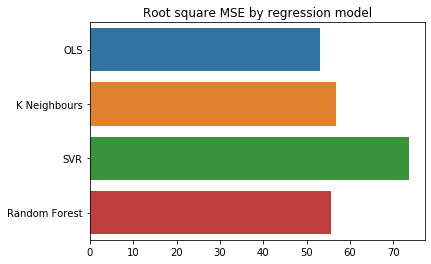

In [61]:
labels = [i for i in mse_dict.keys()]
values = [mse_dict[l]**0.5 for l in labels]


sns.barplot(x=values, y=labels)
plt.title('Root square MSE by regression model')

### Conclusion

SVR looks to underperform relative to OLS, K neighbours and Random Forest.

In the absence of hyperparameter tuning we would go with the minimum being OLS.

This also has the advantage of being easy to explain which helps in a business context.